# Aula 1 - Análise de Dados com Pandas

In [55]:
import pandas as pd

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [57]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [59]:
df.shape

(133349, 11)

In [60]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [61]:
var1, colunas = df.shape[0], df.shape[1]
print('linhas:', var1)
print('colunas:', colunas)

linhas: 133349
colunas: 11


In [62]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [63]:
df.columns = ['ano',
              'senioridade',
              'contrato',
              'cargo', 'salario',
              'moeda',
              'usd',
              'residencia',
              'remoto',
              'empresa',
              'porte_empresa']
display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [64]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [65]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [66]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [67]:
df['porte_empresa'].value_counts()

,count
porte_empresa,
M,129561
L,3574
S,214


In [68]:
from contextlib import ContextDecorator
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df["senioridade"].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [69]:
contrato = {
    'FT': 'Tempo_Integral',
    'CT': 'Contrato_Temporario',
    'PT': 'Meio_Periodo',
    'FL': 'Freelancer',
}

df['contrato'] = df['contrato'].replace(contrato)
df["contrato"].value_counts()

,count
contrato,
Tempo_Integral,132563
Contrato_Temporario,394
Meio_Periodo,376
Freelancer,16


In [70]:
porte_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['porte_empresa'] = df['porte_empresa'].replace(porte_empresa)
display(df['porte_empresa'].value_counts())

,count
porte_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [71]:
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remoto)
display(df['remoto'].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [72]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025.0,Senior,Tempo_Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo_Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo_Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo_Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo_Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [73]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,porte_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo_Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [74]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Preparação e limpeza dos Dados

In [75]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [76]:
# visão dos dados
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025.0,Senior,Tempo_Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo_Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo_Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo_Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo_Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [77]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [78]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [79]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
5588,NaN,Senior,Tempo_Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo_Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo_Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo_Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo_Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo_Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo_Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo_Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo_Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo_Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [80]:
import numpy as np

# Criação de um dataframe de teste para usar de exemplo.
df_salarios = pd.DataFrame({
    'nome': ["Fernando", "Lucas", "Carlos", "Douglas", "Val"],
    'salario': [4000, np.nan, 5000, np.nan, 40000]
})

# Calcula a média salarial e substitui os nulos pela média e arredonda os valores.
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Calcula a mediana e substitui os nulos pela mediana.
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Fernando,4000.0,4000.00,4000.0
1,Lucas,NaN,16333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Douglas,NaN,16333.33,5000.0
4,Val,40000.0,40000.00,40000.0


In [81]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"],
    "Temperatura": [30, np.nan, 32, np.nan, 28, 27, 30]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,32.0,32.0
3,Quinta,NaN,32.0
4,Sexta,28.0,28.0
5,Sábado,27.0,27.0
6,Domingo,30.0,30.0


In [82]:
df_cidades = pd.DataFrame({
    'name': ["Fernando", "Lucas", "Carlos", "Douglas", "Val"],
    'cidade': ['São Paulo', np.nan, "Rio de Janeiro", "Belém", np.nan]
})

df_cidades['cidade_preenchida'] = df_cidades["cidade"].fillna("Não Informado")
display(df_cidades)

,name,cidade,cidade_preenchida
0,Fernando,São Paulo,São Paulo
1,Lucas,NaN,Não Informado
2,Carlos,Rio de Janeiro,Rio de Janeiro
3,Douglas,Belém,Belém
4,Val,NaN,Não Informado


In [83]:
# Criando um dataframe para limpeza dos dados.
df_limpo = df.dropna()

In [84]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [85]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025.0,Senior,Tempo_Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo_Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo_Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo_Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo_Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [86]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ano            133339 non-null  float64
 1   senioridade    133339 non-null  object 
 2   contrato       133339 non-null  object 
 3   cargo          133339 non-null  object 
 4   salario        133339 non-null  int64  
 5   moeda          133339 non-null  object 
 6   usd            133339 non-null  int64  
 7   residencia     133339 non-null  object 
 8   remoto         133339 non-null  object 
 9   empresa        133339 non-null  object 
 10  porte_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [87]:
# Transformando o ano da tabela em u número não decimal.
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

# Aula 3 - Visualização de Dados | Gráficos

In [88]:
 df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025,Senior,Tempo_Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo_Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo_Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo_Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo_Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

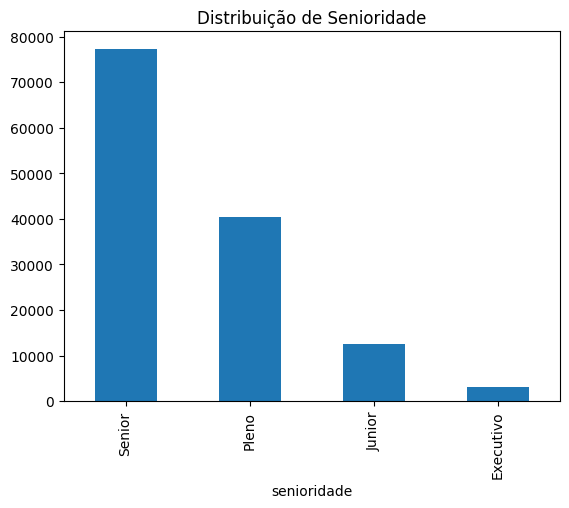

In [89]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [90]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

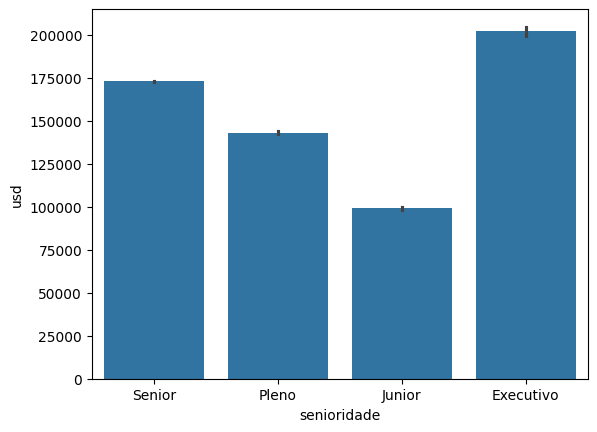

In [91]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [92]:
import matplotlib.pyplot as plt

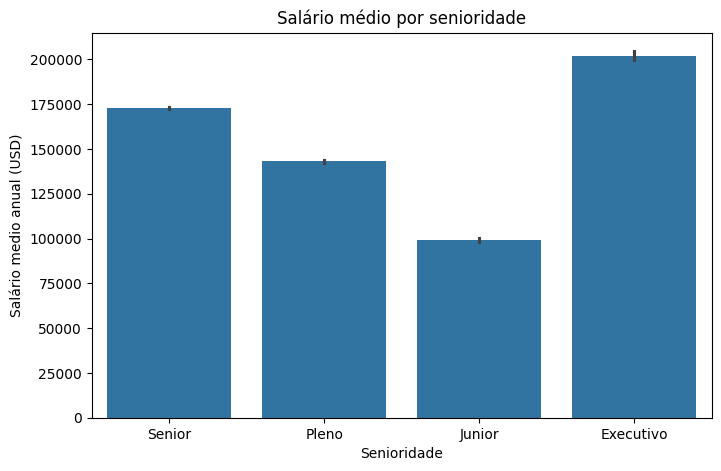

In [93]:
# Melhorando a vizualização do gráfico.
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário medio anual (USD)')
plt.show()

In [94]:
# Calcula a média dos valores
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [95]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

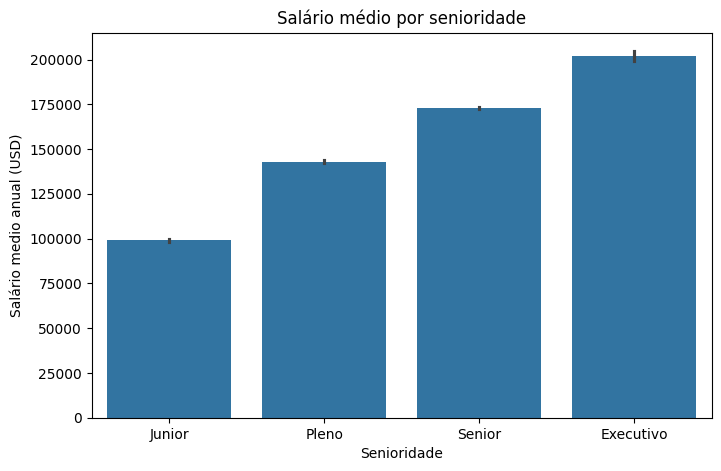

In [96]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário medio anual (USD)')
plt.show()

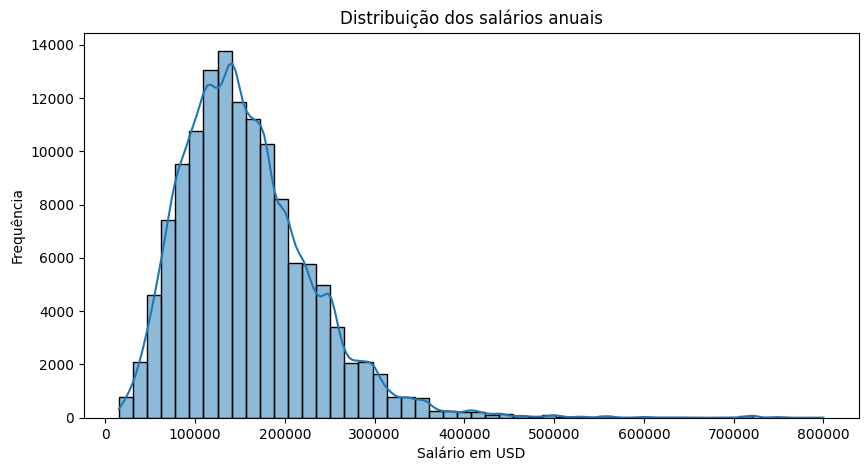

In [97]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins= 50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

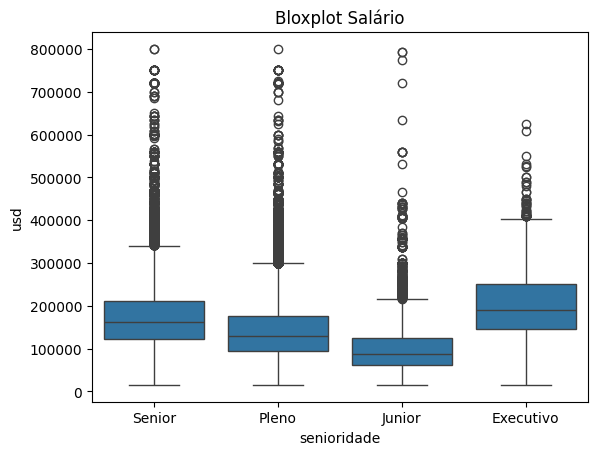

In [98]:
boxplot = sns.boxplot(data=df_limpo, x='senioridade', y='usd')
boxplot.set_title('Bloxplot Salário')
plt.show()

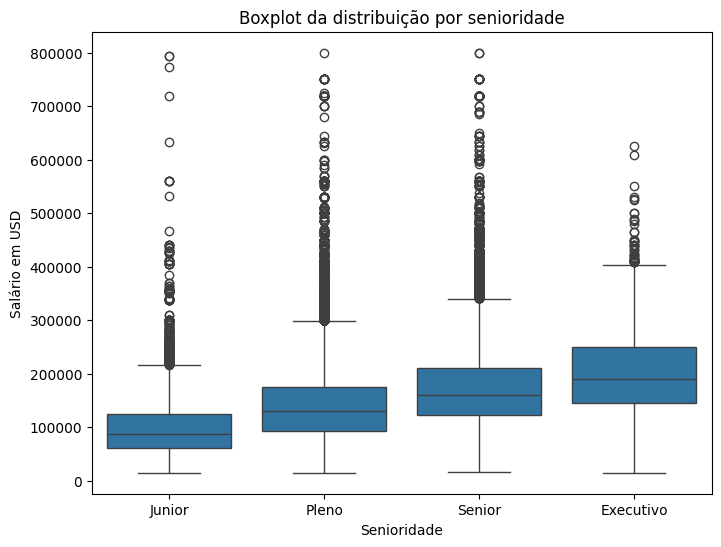

In [100]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário em USD')
plt.show()

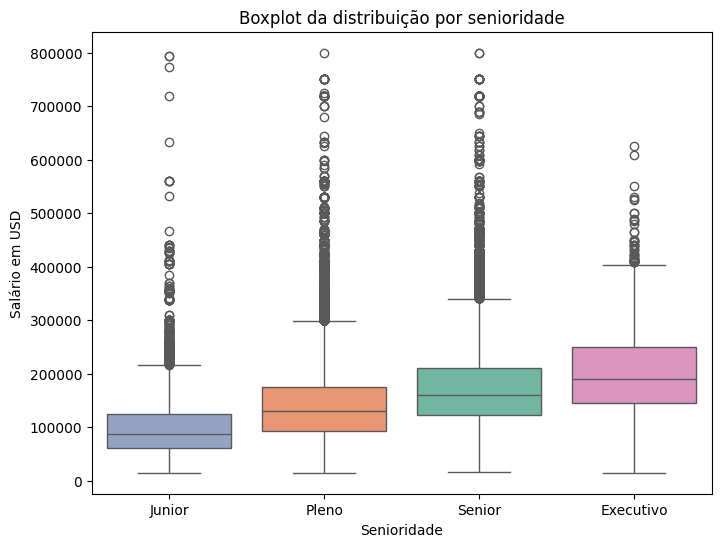

In [101]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário em USD')
plt.show()

In [102]:
import plotly.express as px

In [103]:
# Prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly
df_senioridade_salario = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

fig = px.bar(
    df_senioridade_salario,
    x='senioridade',
    y='usd',
    title='Salário médio por senioridade',
    labels={'senioridade': 'Nível', 'usd': 'Salário médio anual (USD)'},
    category_orders={'senioridade': ordem_senioridade}
)

fig.show()

In [104]:
# Gráfico de pizza
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'
            )
fig.show()

In [105]:
# Gráfico circular.
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
            )
fig.show()

In [106]:
# Gráfico Hole com nomes e porcentagem e interativo.
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
            )
fig.update_traces(textinfo='percent+label')
fig.show()

In [112]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.0 MB/s eta 0:00:00


In [114]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except:
    return None

# Aplicando a função para converter os códigos ISO-2 para ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio anual (USD)', 'residencia_iso3': 'País'}
                    )
fig.show()

In [115]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa,residencia_iso3
0,2025,Senior,Tempo_Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Senior,Tempo_Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo_Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Tempo_Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Tempo_Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [117]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)